In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

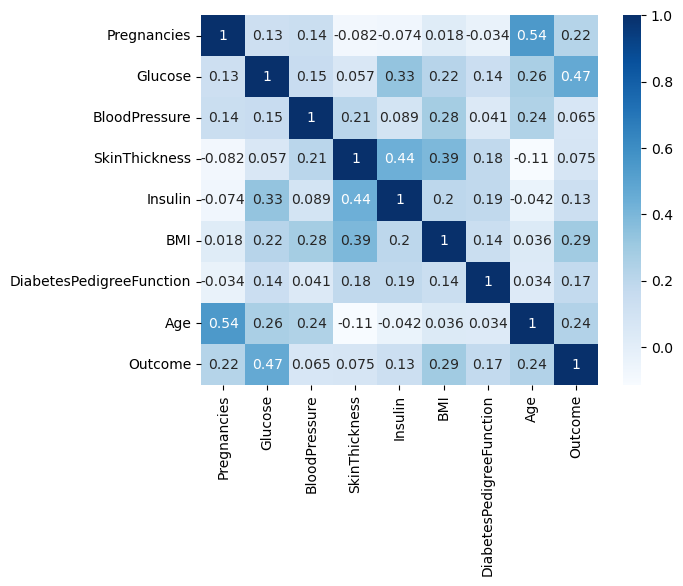

In [9]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)

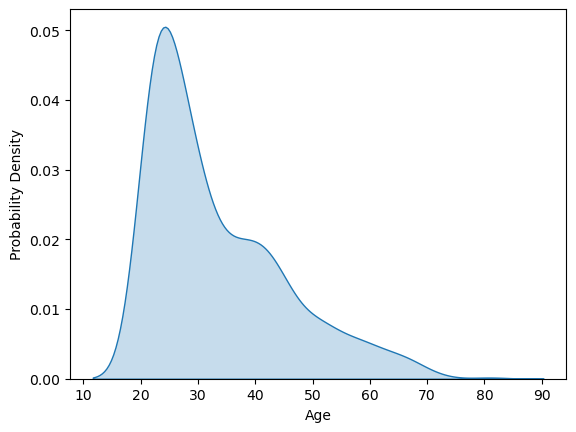

In [12]:
sns.kdeplot(df['Age'], shade=True)
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.show()

In [13]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

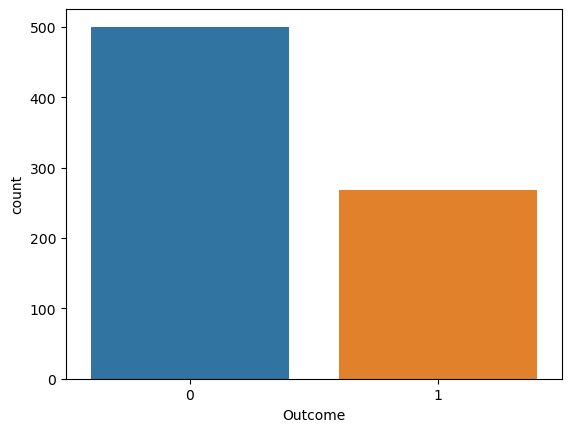

In [14]:
sns.countplot(x='Outcome', data=df)
plt.show()

([<matplotlib.patches.Wedge at 0x21d4ce422d0>,
 [Text(-0.5025943242672991, 0.9784676515931925, '0-Non Diabeltic'),
  Text(0.5025944158780503, -0.9784676045369114, '1-Diabetic')],
 [Text(-0.27414235869125403, 0.5337096281417413, '65.10%'),
  Text(0.2741424086607547, -0.5337096024746789, '34.90%')])

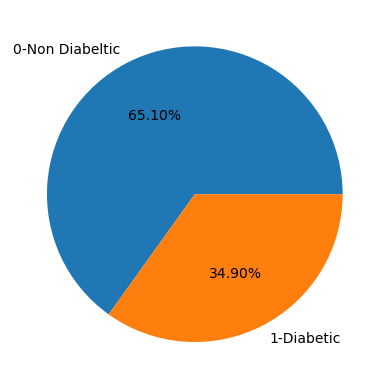

In [64]:
piec=df['Outcome'].value_counts()
plt.pie(piec,labels=('0-Non Diabeltic','1-Diabetic'),autopct="%.2f%%")

In [15]:
x=df.drop(['Outcome'], axis=1).values
y=df['Outcome'].values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.20, random_state=42)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

In [24]:
for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracy[i]=knn.score(x_train, y_train)
    test_accuracy[i]=knn.score(x_test, y_test)

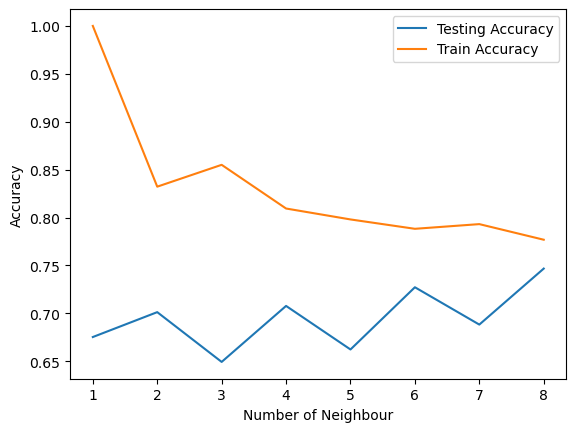

In [25]:
plt.plot(neighbors, test_accuracy, label="Testing Accuracy")
plt.plot(neighbors, train_accuracy, label="Train Accuracy")
plt.legend()
plt.xlabel("Number of Neighbour")
plt.ylabel("Accuracy")
plt.show()

As test accracy is high at k=8, We adopt the KNeighborsClassifier with number of neighbours as 8

In [30]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [31]:
print(knn.score(x_test, y_test)*100)

74.67532467532467


In [33]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [38]:
y_pred=knn.predict(x_test)

In [40]:
print("Accuracy Score: ", metrics.accuracy_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))
print("Precision Score: ", metrics.precision_score(y_test, y_pred))
print("Recall Score: ", metrics.recall_score(y_test, y_pred))
print("ROC-AUC Score: ", metrics.roc_auc_score(y_test, y_pred))

Accuracy Score:  0.7467532467532467
F1 Score:  0.6355140186915889
Precision Score:  0.6538461538461539
Recall Score:  0.6181818181818182
ROC-AUC Score:  0.7181818181818181


In [42]:
cfm=confusion_matrix(y_test, y_pred)
trueNegative=cfm[0][0]
falsePossitive=cfm[0][1]
false_negative=cfm[1][0]
truePositive=cfm[1][1]

In [43]:
print("Confusion Matrix", cfm)

Confusion Matrix [[81 18]
 [21 34]]


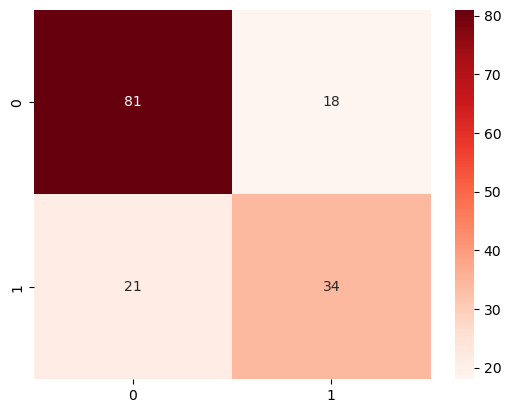

In [45]:
sns.heatmap(cfm, cmap='Reds', annot=True)
plt.show()

In [46]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        99
           1       0.65      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154



In [50]:
y_test_pred_prob=knn.predict_proba(x_test)[:,1]

In [51]:
from sklearn.metrics import roc_curve

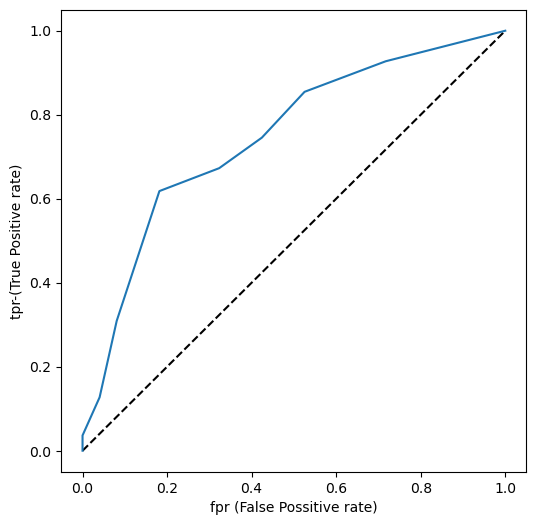

In [62]:
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(6,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='knn')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.show()

In [54]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_test_pred_prob)*100)

74.61891643709826


In [55]:
from sklearn.model_selection import  GridSearchCV

In [56]:
param_grid={'n_neighbours':np.arange(1,50)}

In [57]:
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [58]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [59]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(x, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=8),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [60]:
grid.best_score_

0.7552973342447027

In [61]:
grid.best_params_

{'n_neighbors': 17}

In [65]:
from sklearn.naive_bayes import GaussianNB

In [66]:
nbmodel=GaussianNB()

In [68]:
nbmodel.fit(x_train,y_train)

GaussianNB()

In [70]:
nb_y_pred=nbmodel.predict(x_test)

In [71]:
nbConfusion = metrics.confusion_matrix(y_test, nb_y_pred)
nbConfusion

array([[79, 20],
       [16, 39]], dtype=int64)

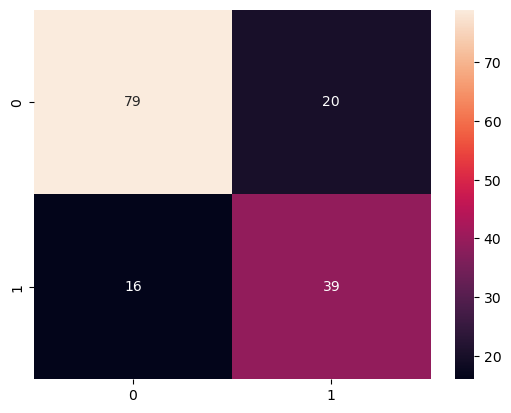

In [73]:
sns.heatmap(nbConfusion,  annot=True)
plt.show()

In [76]:
print( nbmodel.score(x_test,y_test) * 100,'%')

76.62337662337663 %


In [77]:
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [78]:
metrics.f1_score(y_test, nb_y_pred)

0.6842105263157895

In [79]:
nb_roc_auc = metrics.roc_auc_score(y_test,nb_y_pred)
print ('Roc Auc Score: ', nb_roc_auc)

Roc Auc Score:  0.7535353535353535


In [82]:
nb_y_pred_prob = nbmodel.predict_proba(x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, nb_y_pred_prob)

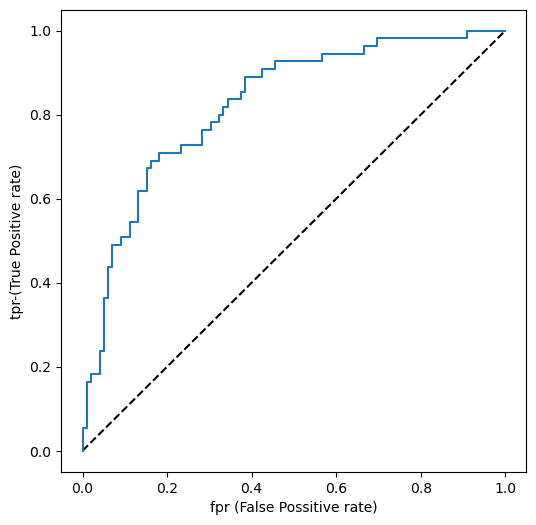

In [85]:
plt.figure(figsize=(6,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr1, tpr1, label='naive bayes')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.show()